In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('max_colwidth',100)

In [3]:
df=pd.read_csv('pokemon0820.csv')

In [4]:
ddf=df.query("is_legendary == 0").query("generation == 5")
ddf['main_attack']=np.where((ddf['attack']>ddf['sp_attack']),ddf['attack'],ddf['sp_attack'])
ddf['stats_total']=ddf['hp']+ddf['main_attack']+ddf['defense']+ddf['sp_defense']+ddf['speed']
ddf['point']=0
ddf.head()
ddf[:]

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,against_ground,against_ice,against_normal,against_poison,against_psychic,against_rock,against_steel,against_water,attack,base_egg_steps,base_happiness,base_total,capture_rate,classfication,defense,experience_growth,height_m,hp,japanese_name,name,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary,main_attack,stats_total,point
494,"['Overgrow', 'Contrary']",2.00,1.00,1.0,0.5,1.0,1.00,2.00,2.0,1.0,0.50,0.50,2.0,1.0,2.00,1.0,1.00,1.0,0.5,45,5120,70,308,45,Grass Snake Pokémon,55,1059860,0.6,45,Tsutarjaツタージャ,Snivy,88.1,495,45,55,63,grass,NaN,8.1,5,0,45,263,0
495,"['Overgrow', 'Contrary']",2.00,1.00,1.0,0.5,1.0,1.00,2.00,2.0,1.0,0.50,0.50,2.0,1.0,2.00,1.0,1.00,1.0,0.5,60,5120,70,413,45,Grass Snake Pokémon,75,1059860,0.8,60,Janovyジャノビー,Servine,88.1,496,60,75,83,grass,NaN,16.0,5,0,60,353,0
496,"['Overgrow', 'Contrary']",2.00,1.00,1.0,0.5,1.0,1.00,2.00,2.0,1.0,0.50,0.50,2.0,1.0,2.00,1.0,1.00,1.0,0.5,75,5120,70,528,45,Regal Pokémon,95,1059860,3.3,75,Jalordaジャローダ,Serperior,88.1,497,75,95,113,grass,NaN,63.0,5,0,75,453,0
497,"['Blaze', 'Thick Fat']",0.50,1.00,1.0,1.0,0.5,1.00,0.50,1.0,1.0,0.50,2.00,0.5,1.0,1.00,1.0,2.00,0.5,2.0,63,5120,70,308,45,Fire Pig Pokémon,45,1059860,0.5,65,Pokabuポカブ,Tepig,88.1,498,45,45,45,fire,NaN,9.9,5,0,63,263,0
498,"['Blaze', 'Thick Fat']",0.25,0.50,1.0,1.0,1.0,1.00,0.50,2.0,1.0,0.50,2.00,0.5,1.0,1.00,2.0,1.00,0.5,2.0,93,5120,70,418,45,Fire Pig Pokémon,55,1059860,1.0,90,Chaobooチャオブー,Pignite,88.1,499,70,55,55,fire,fighting,55.5,5,0,93,348,0
499,"['Blaze', 'Reckless']",0.25,0.50,1.0,1.0,1.0,1.00,0.50,2.0,1.0,0.50,2.00,0.5,1.0,1.00,2.0,1.00,0.5,2.0,123,5120,70,528,45,Mega Fire Pig Pokémon,65,1059860,1.6,110,Enbuohエンブオー,Emboar,88.1,500,100,65,65,fire,fighting,150.0,5,0,123,428,0
500,"['Torrent', 'Shell Armor']",1.00,1.00,1.0,2.0,1.0,1.00,0.50,1.0,1.0,2.00,1.00,0.5,1.0,1.00,1.0,1.00,0.5,0.5,55,5120,70,308,45,Sea Otter Pokémon,45,1059860,0.5,55,Mijumaruミジュマル,Oshawott,88.1,501,63,45,45,water,NaN,5.9,5,0,63,253,0
501,"['Torrent', 'Shell Armor']",1.00,1.00,1.0,2.0,1.0,1.00,0.50,1.0,1.0,2.00,1.00,0.5,1.0,1.00,1.0,1.00,0.5,0.5,75,5120,70,413,45,Discipline Pokémon,60,1059860,0.8,75,Futachimaruフタチマル,Dewott,88.1,502,83,60,60,water,NaN,24.5,5,0,83,338,0
502,"['Torrent', 'Shell Armor']",1.00,1.00,1.0,2.0,1.0,1.00,0.50,1.0,1.0,2.00,1.00,0.5,1.0,1.00,1.0,1.00,0.5,0.5,100,5120,70,528,45,Formidable Pokémon,85,1059860,1.5,95,Daikenkiダイケンキ,Samurott,88.1,503,108,70,70,water,NaN,94.6,5,0,108,428,0
503,"['Run Away', 'Keen Eye', 'Analytic']",1.00,1.00,1.0,1.0,1.0,2.00,1.00,1.0,0.0,1.00,1.00,1.0,1.0,1.00,1.0,1.00,1.0,1.0,55,3840,70,255,255,Scout Pokémon,39,1000000,0.5,45,Minezumiミネズミ,Patrat,50.0,504,35,39,42,normal,NaN,11.6,5,0,55,220,0


In [5]:
items = [
    {
        'name': '天桐（三曜道馆：草系）',
        'attrs': 'grass'
    },
    {
        'name': '伯特（三曜道馆：火系）',
        'attrs': 'fire'
    },
    {
        'name': '寇恩（三曜道馆：水系）',
        'attrs': 'water'
    },
    {
        'name': '芦荟 （七宝道馆：一般系）',
        'attrs': 'normal'
    },
    {
        'name': '亚堤 （飞云道馆：虫系）',
        'attrs': 'bug'
    },
    {
        'name': '小菊儿 （雷文道馆：电系）',
        'attrs': 'electric'
    },
    {
        'name': '菊老大 （帆巴道馆：地面系）',
        'attrs': 'ground'
    },
    {
        'name': '风露 （吹寄道馆：飞行系）',
        'attrs': 'flying'
    },
    {
        'name': '哈奇库 （雪花道馆：冰系）',
        'attrs': 'ice'
    },
    {
        'name': '艾莉丝 （双龙道馆：龙系）',
        'attrs': 'dragon'
    }
]

In [16]:
def calucate_point(item):
    attrs = item['attrs']
    df_item = ddf.query('against_{} >= 1'.format(attrs))
    df_item = df_item.sort_values('stats_total',ascending=False)
    index = df_item.head(6).index
    ddf.loc[index,'point']+=1
    print(f"打{attrs}系最强阵容是 {index}")

for item in items:
    calucate_point(item)

打grass系最强阵容是 Int64Index([530, 614, 529, 525, 566, 507], dtype='int64')
打fire系最强阵容是 Int64Index([636, 530, 614, 529, 629, 507], dtype='int64')
打water系最强阵容是 Int64Index([554, 636, 530, 608, 614, 529], dtype='int64')
打normal系最强阵容是 Int64Index([554, 634, 636, 530, 611, 614], dtype='int64')
打bug系最强阵容是 Int64Index([634, 530, 611, 614, 525, 507], dtype='int64')
打electric系最强阵容是 Int64Index([554, 636, 530, 614, 608, 525], dtype='int64')
打ground系最强阵容是 Int64Index([554, 634, 636, 530, 611, 608], dtype='int64')
打flying系最强阵容是 Int64Index([554, 634, 636, 530, 611, 614], dtype='int64')
打ice系最强阵容是 Int64Index([634, 530, 611, 529, 525, 566], dtype='int64')
打dragon系最强阵容是 Int64Index([554, 634, 636, 530, 611, 614], dtype='int64')


In [17]:
ddf=ddf.sort_values(by='point',ascending=False)
team=ddf.head(6)
df=['name','hp','attack','defense','sp_attack','sp_defense','speed']
index=team.index
team[df]

,name,hp,attack,defense,sp_attack,sp_defense,speed
634,Hydreigon,92,105,90,125,90,98
636,Volcarona,85,60,65,135,105,100
554,Darmanitan,105,30,105,140,105,55
614,Cryogonal,80,50,50,95,135,105
525,Gigalith,85,135,130,60,80,25
530,Audino,103,60,126,80,126,50


<AxesSubplot:title={'center':'pokemon'}, xlabel='name', ylabel='species strength'>

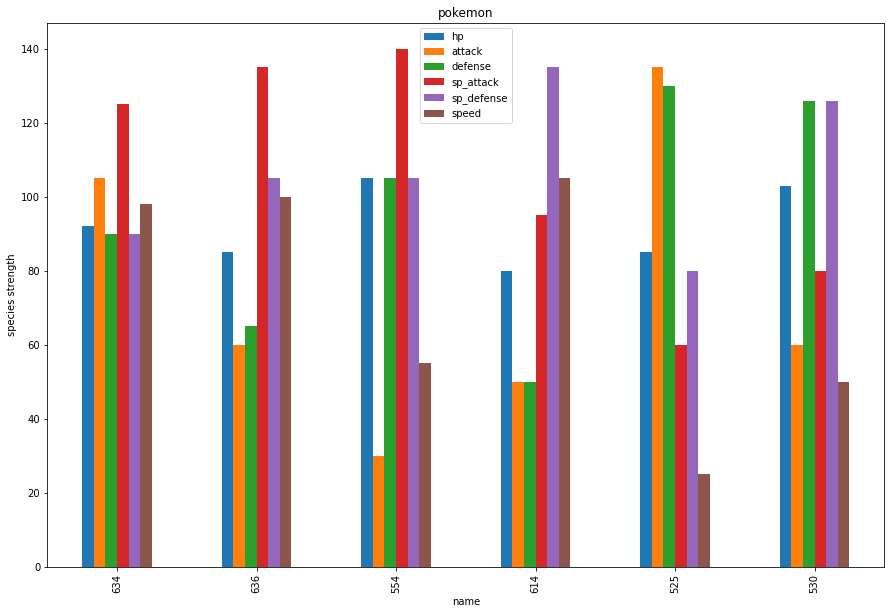

In [18]:
ddf=ddf.sort_values(by='point',ascending=False)
team=ddf.head(6)
index=team.index
team[df].plot(kind='bar', title=('pokemon'), xlabel=('name'), ylabel=('species strength'), figsize=(15,10))

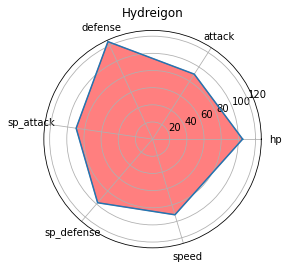

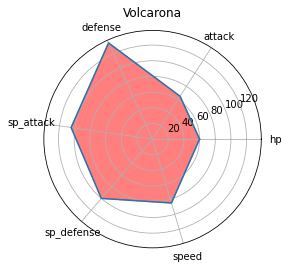

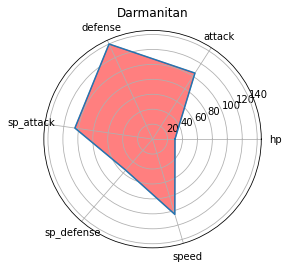

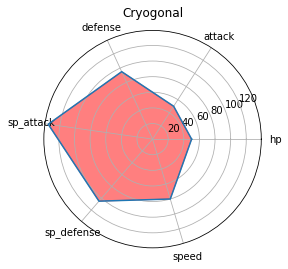

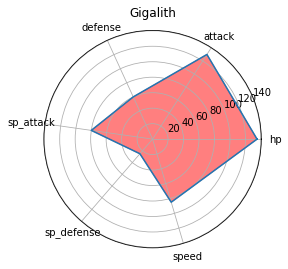

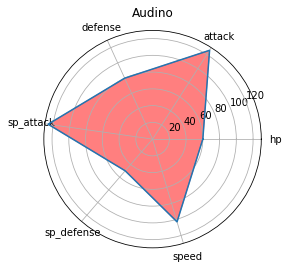

In [19]:
for i in range(6):
    pokemon=team.loc[index[i]]
    features=['hp','attack','defense','sp_attack','sp_defense','speed']
    values=[pokemon.attack,pokemon.defense,pokemon.sp_attack,pokemon.sp_defense,pokemon.speed,pokemon.hp]
    features=np.concatenate((features,[features[0]]))
    values=np.concatenate((values,[values[0]]))
    ax=plt.polar(features,values)
    plt.title(pokemon['name'])
    plt.fill(features,values,color='red',alpha=0.5)
    plt.show()